# Data Wrangling and Exploratory Data Analysis

In this notebook, we aim to examine the data in both the Accomodation and Tourism visit datasets to see what relationship and interesting information we can glean from these datasets. Our end goal is to perform forecasting predictions on these datasets.

In [1]:
# Load the usual things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
accomodation = pd.read_csv('E:/Springboard_GIT/Tourism-Forecasting/NZ Data/Primary Data - Accomodation Occupancy and Capacity by Region.csv')
arrivals = pd.read_csv('E:/Springboard_GIT/Tourism-Forecasting/NZ Data/Primary Data - Arrivals for All Visitors by Port and Purpose.csv')

In [3]:
#Examining Data
#Monthly capacity is how much space is available on a monthly basis
#Monthly occupancy is how much space is occupied on a monthly basis
accomodation.head()

Unnamed: 0  TotalNorthlandCapacity  TotalNorthlandOccupancy  \
0    2001M01                  322710                   120769   
1    2001M02                  291508                    84755   
2    2001M03                  323392                    79564   
3    2001M04                  312960                    64383   
4    2001M05                  313720                    42146   

   TotalAucklandCapacity  TotalAucklandOccupancy  TotalCoromandelCapacity  \
0                 496093                  280342                   131316   
1                 444388                  267818                   118944   
2                 495163                  282679                   129580   
3                 480120                  226099                   125820   
4                 501115                  219150                   128929   

   TotalCoromandelOccupancy  TotalWaikatoCapacity  TotalWaikatoOccupancy  \
0                     66529                134261                  45190   
1                     33820                121772                  40636   
2                     29965                134509                  49575   
3                     22430                130380                  39024   
4                     11329                130820                  35345   

   TotalBay of PlentyCapacity  ...  Holiday parksDunedinCapacity  \
0                      137082  ...                         18321   
1                      122780  ...                         16548   
2                      136059  ...                         18321   
3                      131670  ...                         17730   
4                      136059  ...                         18321   

   Holiday parksDunedinOccupancy  Holiday parksCluthaCapacity  \
0                           6277                         8804   
1                           4722                         7952   
2                           4758                         8804   
3                           3578                         8520   
4                           2194                         7223   

   Holiday parksCluthaOccupancy  Holiday parksFiordlandCapacity  \
0                          2534                           12059   
1                          1748                           10892   
2                          1399                           12059   
3                          1138                           11670   
4                           698                           12059   

   Holiday parksFiordlandOccupancy  Holiday parksSouthlandCapacity  \
0                               ..                           29853   
1                               ..                           26964   
2                               ..                           29853   
3                               ..                           28890   
4                               ..                           25947   

   Holiday parksSouthlandOccupancy  Holiday parksAll New ZealandCapacity  \
0                               ..                               1713649   
1                               ..                               1541876   
2                               ..                               1698583   
3                             3825                               1621260   
4                               ..                               1537042   

   Holiday parksAll New ZealandOccupancy  
0                                 557313  
1                                 276204  
2                                 239677  
3                                 199816  
4                                  97871  

[5 rows x 331 columns]

Start by examining accomodation data. Similar format for arrivals and will do similar processes.

There needed to be some cleaning in Excel to get rid of extraneous rows and rename columns. Thankfully since the data is from the New Zealand government the data is pretty clean and requires little extra cleaning in Pandas. ALso, given that we are doing time forecasting, by nature we will be ignoring any datasets with incomplete data and during our EDA we will ignore incomplete datasets for our initial exploration until we can decide which portion of data we want to focus on for our modeling.

Since we want to work with time data, we will first set the index to our first column and attempt to rewrite it as datetime data.



In [4]:
accomodation = accomodation.rename(columns = {'Unnamed: 0':'Date'})
accomodation.head()

Date  TotalNorthlandCapacity  TotalNorthlandOccupancy  \
0  2001M01                  322710                   120769   
1  2001M02                  291508                    84755   
2  2001M03                  323392                    79564   
3  2001M04                  312960                    64383   
4  2001M05                  313720                    42146   

   TotalAucklandCapacity  TotalAucklandOccupancy  TotalCoromandelCapacity  \
0                 496093                  280342                   131316   
1                 444388                  267818                   118944   
2                 495163                  282679                   129580   
3                 480120                  226099                   125820   
4                 501115                  219150                   128929   

   TotalCoromandelOccupancy  TotalWaikatoCapacity  TotalWaikatoOccupancy  \
0                     66529                134261                  45190   
1                     33820                121772                  40636   
2                     29965                134509                  49575   
3                     22430                130380                  39024   
4                     11329                130820                  35345   

   TotalBay of PlentyCapacity  ...  Holiday parksDunedinCapacity  \
0                      137082  ...                         18321   
1                      122780  ...                         16548   
2                      136059  ...                         18321   
3                      131670  ...                         17730   
4                      136059  ...                         18321   

   Holiday parksDunedinOccupancy  Holiday parksCluthaCapacity  \
0                           6277                         8804   
1                           4722                         7952   
2                           4758                         8804   
3                           3578                         8520   
4                           2194                         7223   

   Holiday parksCluthaOccupancy  Holiday parksFiordlandCapacity  \
0                          2534                           12059   
1                          1748                           10892   
2                          1399                           12059   
3                          1138                           11670   
4                           698                           12059   

   Holiday parksFiordlandOccupancy  Holiday parksSouthlandCapacity  \
0                               ..                           29853   
1                               ..                           26964   
2                               ..                           29853   
3                               ..                           28890   
4                               ..                           25947   

   Holiday parksSouthlandOccupancy  Holiday parksAll New ZealandCapacity  \
0                               ..                               1713649   
1                               ..                               1541876   
2                               ..                               1698583   
3                             3825                               1621260   
4                               ..                               1537042   

   Holiday parksAll New ZealandOccupancy  
0                                 557313  
1                                 276204  
2                                 239677  
3                                 199816  
4                                  97871  

[5 rows x 331 columns]

In [5]:
#convert date to date-time
accomodation['Date'] = pd.to_datetime(accomodation['Date'], yearfirst = True, format = '%YM%m')
accomodation.head()

Date  TotalNorthlandCapacity  TotalNorthlandOccupancy  \
0 2001-01-01                  322710                   120769   
1 2001-02-01                  291508                    84755   
2 2001-03-01                  323392                    79564   
3 2001-04-01                  312960                    64383   
4 2001-05-01                  313720                    42146   

   TotalAucklandCapacity  TotalAucklandOccupancy  TotalCoromandelCapacity  \
0                 496093                  280342                   131316   
1                 444388                  267818                   118944   
2                 495163                  282679                   129580   
3                 480120                  226099                   125820   
4                 501115                  219150                   128929   

   TotalCoromandelOccupancy  TotalWaikatoCapacity  TotalWaikatoOccupancy  \
0                     66529                134261                  45190   
1                     33820                121772                  40636   
2                     29965                134509                  49575   
3                     22430                130380                  39024   
4                     11329                130820                  35345   

   TotalBay of PlentyCapacity  ...  Holiday parksDunedinCapacity  \
0                      137082  ...                         18321   
1                      122780  ...                         16548   
2                      136059  ...                         18321   
3                      131670  ...                         17730   
4                      136059  ...                         18321   

   Holiday parksDunedinOccupancy  Holiday parksCluthaCapacity  \
0                           6277                         8804   
1                           4722                         7952   
2                           4758                         8804   
3                           3578                         8520   
4                           2194                         7223   

   Holiday parksCluthaOccupancy  Holiday parksFiordlandCapacity  \
0                          2534                           12059   
1                          1748                           10892   
2                          1399                           12059   
3                          1138                           11670   
4                           698                           12059   

   Holiday parksFiordlandOccupancy  Holiday parksSouthlandCapacity  \
0                               ..                           29853   
1                               ..                           26964   
2                               ..                           29853   
3                               ..                           28890   
4                               ..                           25947   

   Holiday parksSouthlandOccupancy  Holiday parksAll New ZealandCapacity  \
0                               ..                               1713649   
1                               ..                               1541876   
2                               ..                               1698583   
3                             3825                               1621260   
4                               ..                               1537042   

   Holiday parksAll New ZealandOccupancy  
0                                 557313  
1                                 276204  
2                                 239677  
3                                 199816  
4                                  97871  

[5 rows x 331 columns]

In [6]:
#set date as index
accomodation = accomodation.set_index("Date")
accomodation.head()

TotalNorthlandCapacity  TotalNorthlandOccupancy  \
Date                                                          
2001-01-01                  322710                   120769   
2001-02-01                  291508                    84755   
2001-03-01                  323392                    79564   
2001-04-01                  312960                    64383   
2001-05-01                  313720                    42146   

            TotalAucklandCapacity  TotalAucklandOccupancy  \
Date                                                        
2001-01-01                 496093                  280342   
2001-02-01                 444388                  267818   
2001-03-01                 495163                  282679   
2001-04-01                 480120                  226099   
2001-05-01                 501115                  219150   

            TotalCoromandelCapacity  TotalCoromandelOccupancy  \
Date                                                            
2001-01-01                   131316                     66529   
2001-02-01                   118944                     33820   
2001-03-01                   129580                     29965   
2001-04-01                   125820                     22430   
2001-05-01                   128929                     11329   

            TotalWaikatoCapacity  TotalWaikatoOccupancy  \
Date                                                      
2001-01-01                134261                  45190   
2001-02-01                121772                  40636   
2001-03-01                134509                  49575   
2001-04-01                130380                  39024   
2001-05-01                130820                  35345   

            TotalBay of PlentyCapacity  TotalBay of PlentyOccupancy  ...  \
Date                                                                 ...   
2001-01-01                      137082                        65859  ...   
2001-02-01                      122780                        38075  ...   
2001-03-01                      136059                        36555  ...   
2001-04-01                      131670                        31781  ...   
2001-05-01                      136059                        24574  ...   

            Holiday parksDunedinCapacity  Holiday parksDunedinOccupancy  \
Date                                                                      
2001-01-01                         18321                           6277   
2001-02-01                         16548                           4722   
2001-03-01                         18321                           4758   
2001-04-01                         17730                           3578   
2001-05-01                         18321                           2194   

            Holiday parksCluthaCapacity  Holiday parksCluthaOccupancy  \
Date                                                                    
2001-01-01                         8804                          2534   
2001-02-01                         7952                          1748   
2001-03-01                         8804                          1399   
2001-04-01                         8520                          1138   
2001-05-01                         7223                           698   

            Holiday parksFiordlandCapacity  Holiday parksFiordlandOccupancy  \
Date                                                                          
2001-01-01                           12059                               ..   
2001-02-01                           10892                               ..   
2001-03-01                           12059                               ..   
2001-04-01                           11670                               ..   
2001-05-01                           12059                               ..   

            Holiday parksSouthlandCapacity  Holiday parksSouthlandOccupancy  \
Date                                                                

In [7]:
#Lets see what different kinds of occupany we have by looking at Auckland

accomodation.filter(regex=('AucklandOccupancy$')).columns

Index(['TotalAucklandOccupancy', 'HotelsAucklandOccupancy',
       'MotelsAucklandOccupancy', 'BackpackersAucklandOccupancy',
       'Holiday parksAucklandOccupancy'],
      dtype='object')

Now that we have the data in a time format, lets just explore the data. There are 330 columns though so we might want to explore them in chunks instead of all at once. We'll also focus on occupancy and not capacity as it's more useful to forecast occupancy than capacity

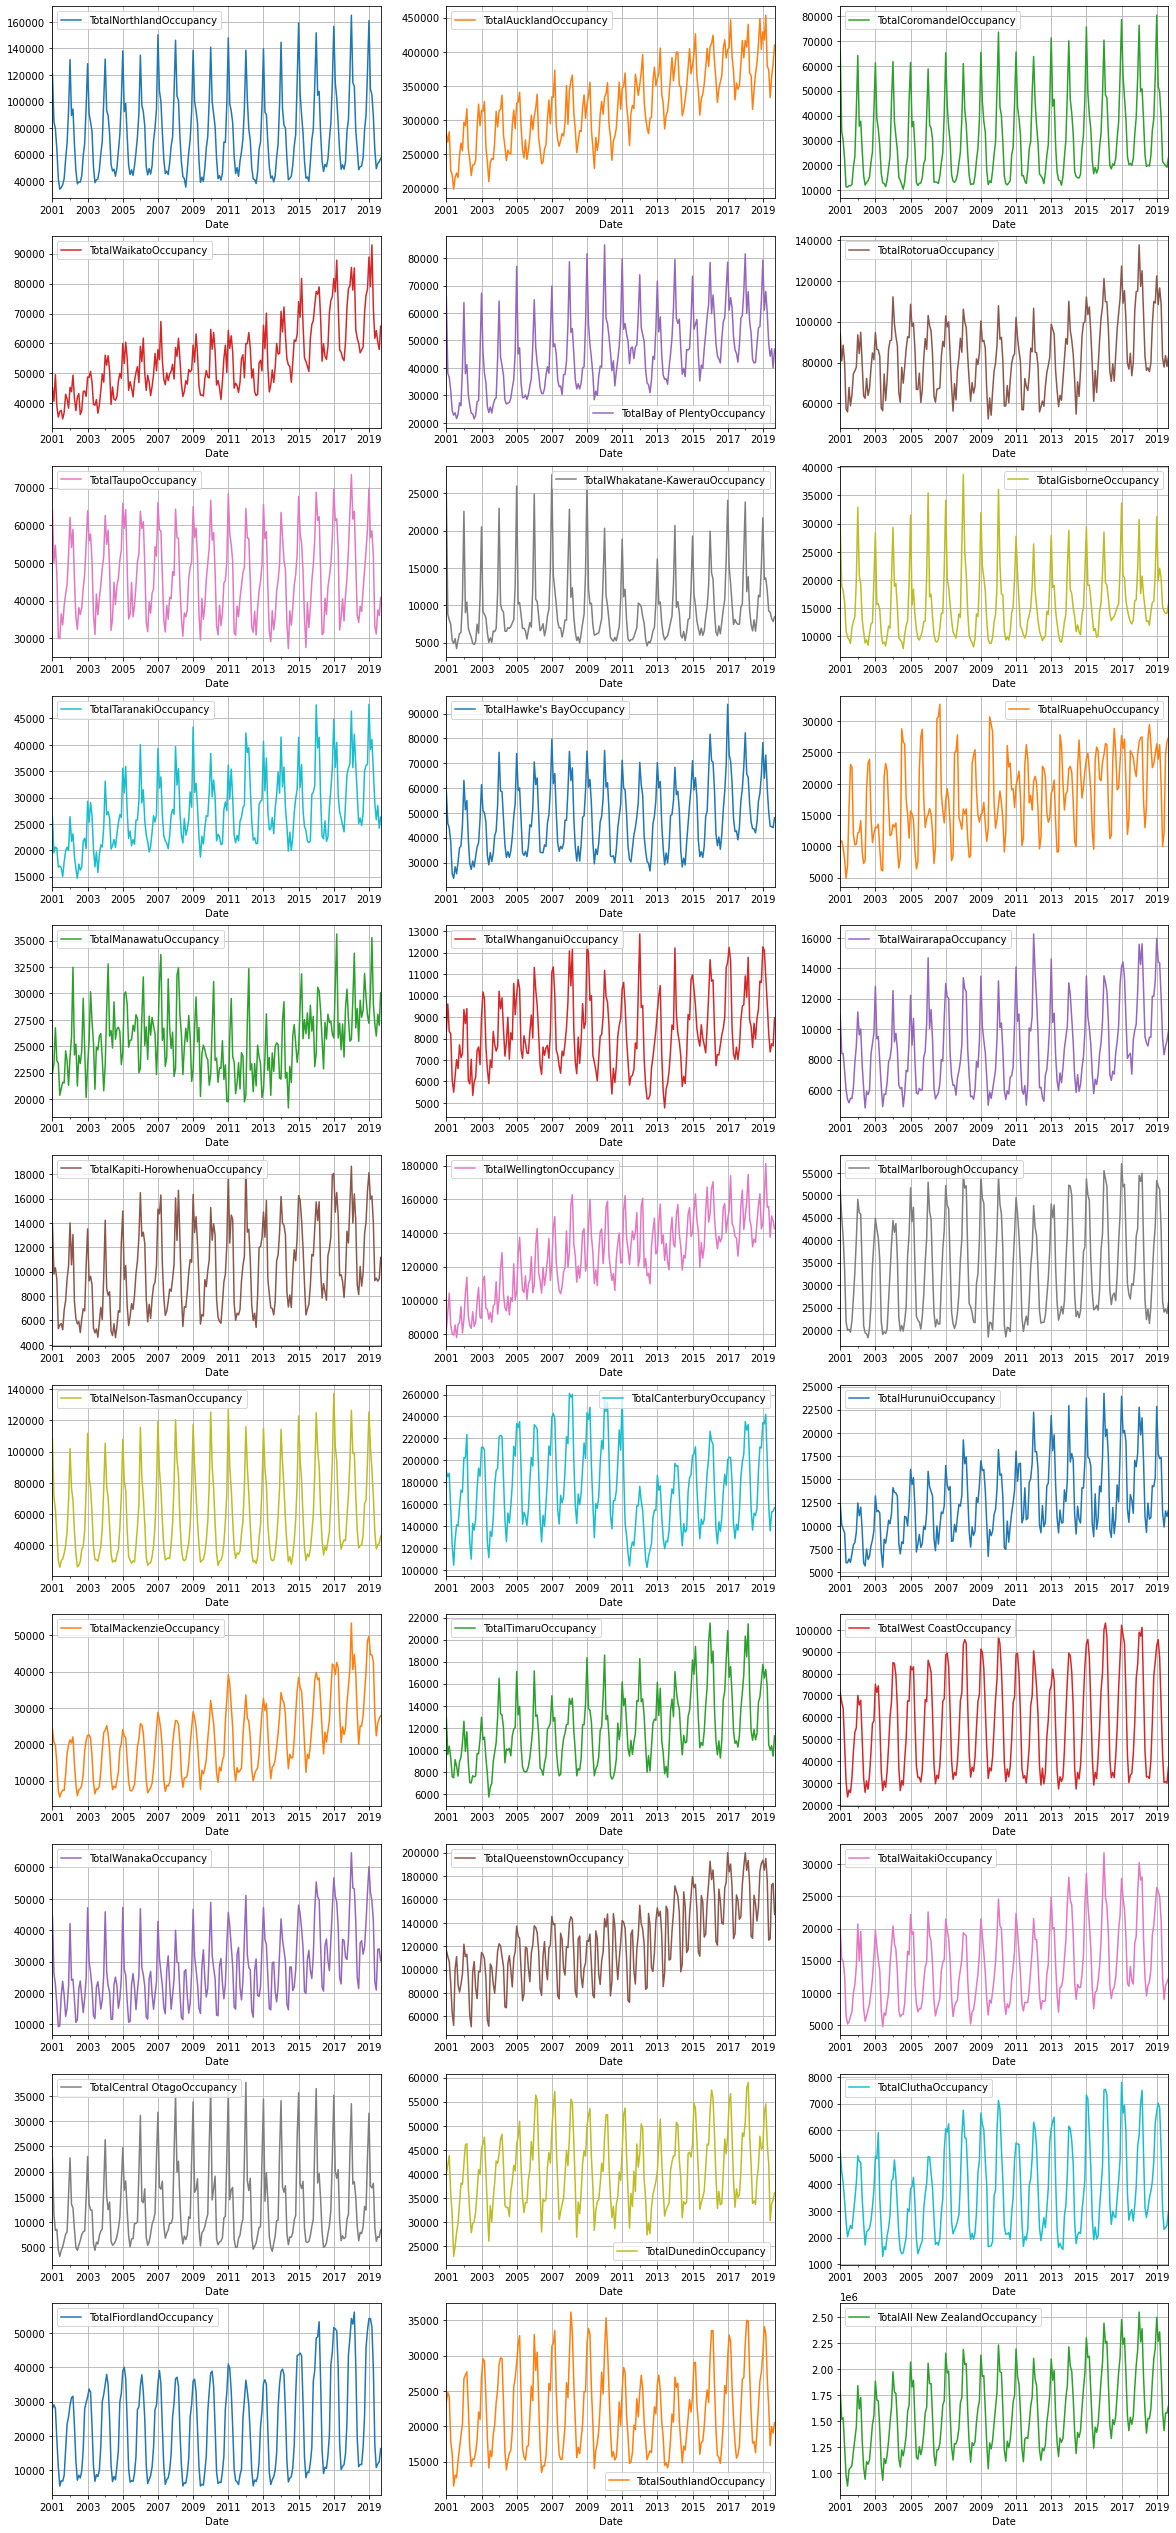

In [8]:
#We will start with our Total occupancy for ALL accomodation types

total_accomodation = accomodation.filter(regex=('^Total')).filter(regex=('Occupancy$')).columns

accomodation[total_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(total_accomodation)/3)+1, 3), figsize = (20,50));

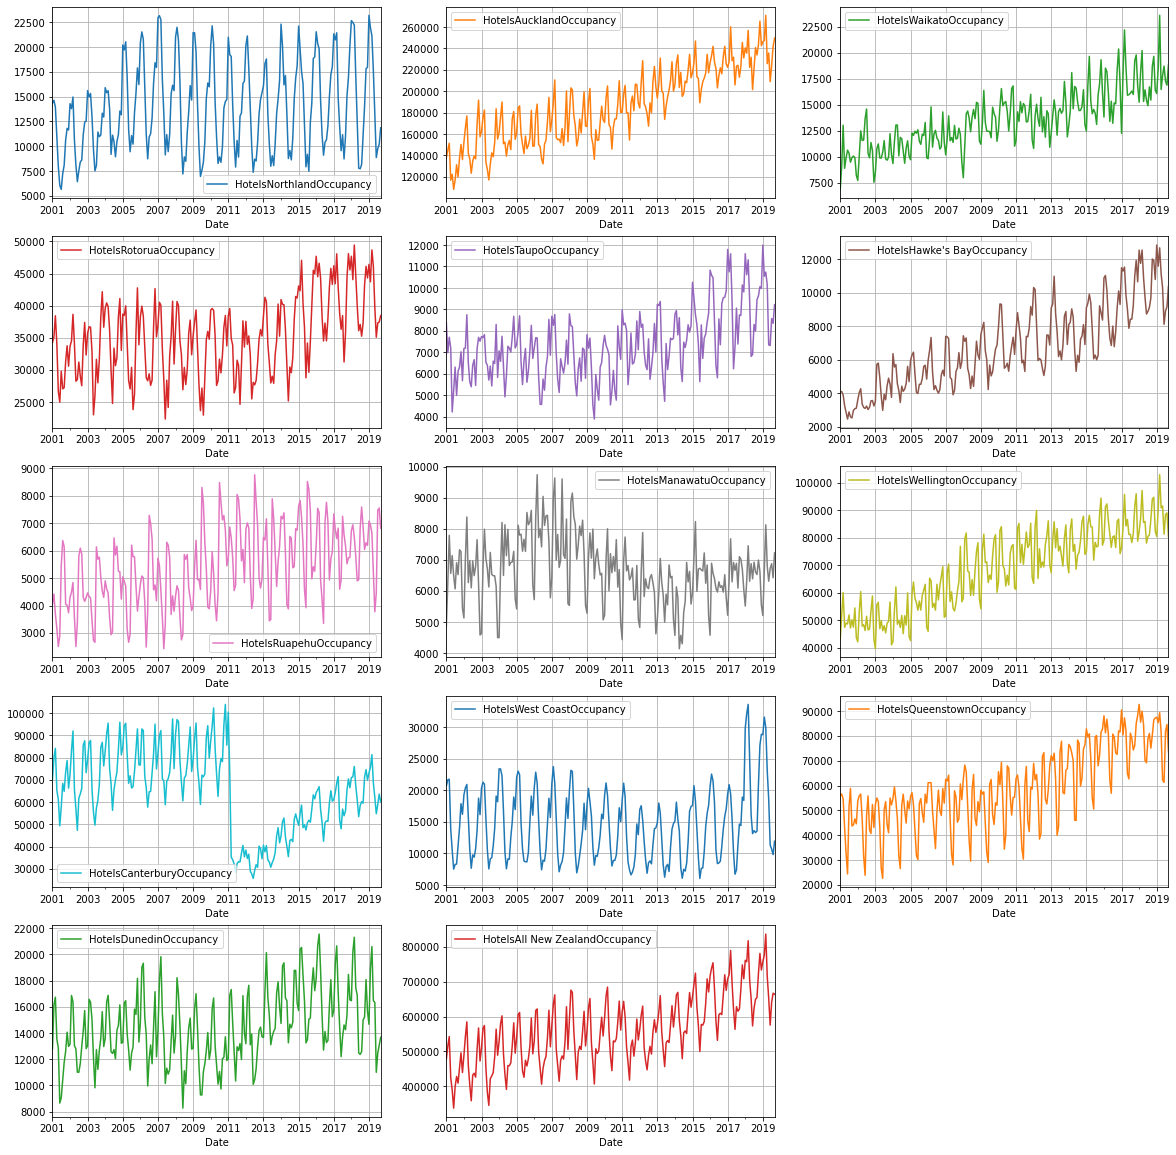

In [9]:
#lets look at hotels
hotel_accomodation = accomodation.filter(regex=('^Hotel')).filter(regex=('Occupancy$')).columns

accomodation[hotel_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(hotel_accomodation)/3)+1, 3), figsize = (20,50));

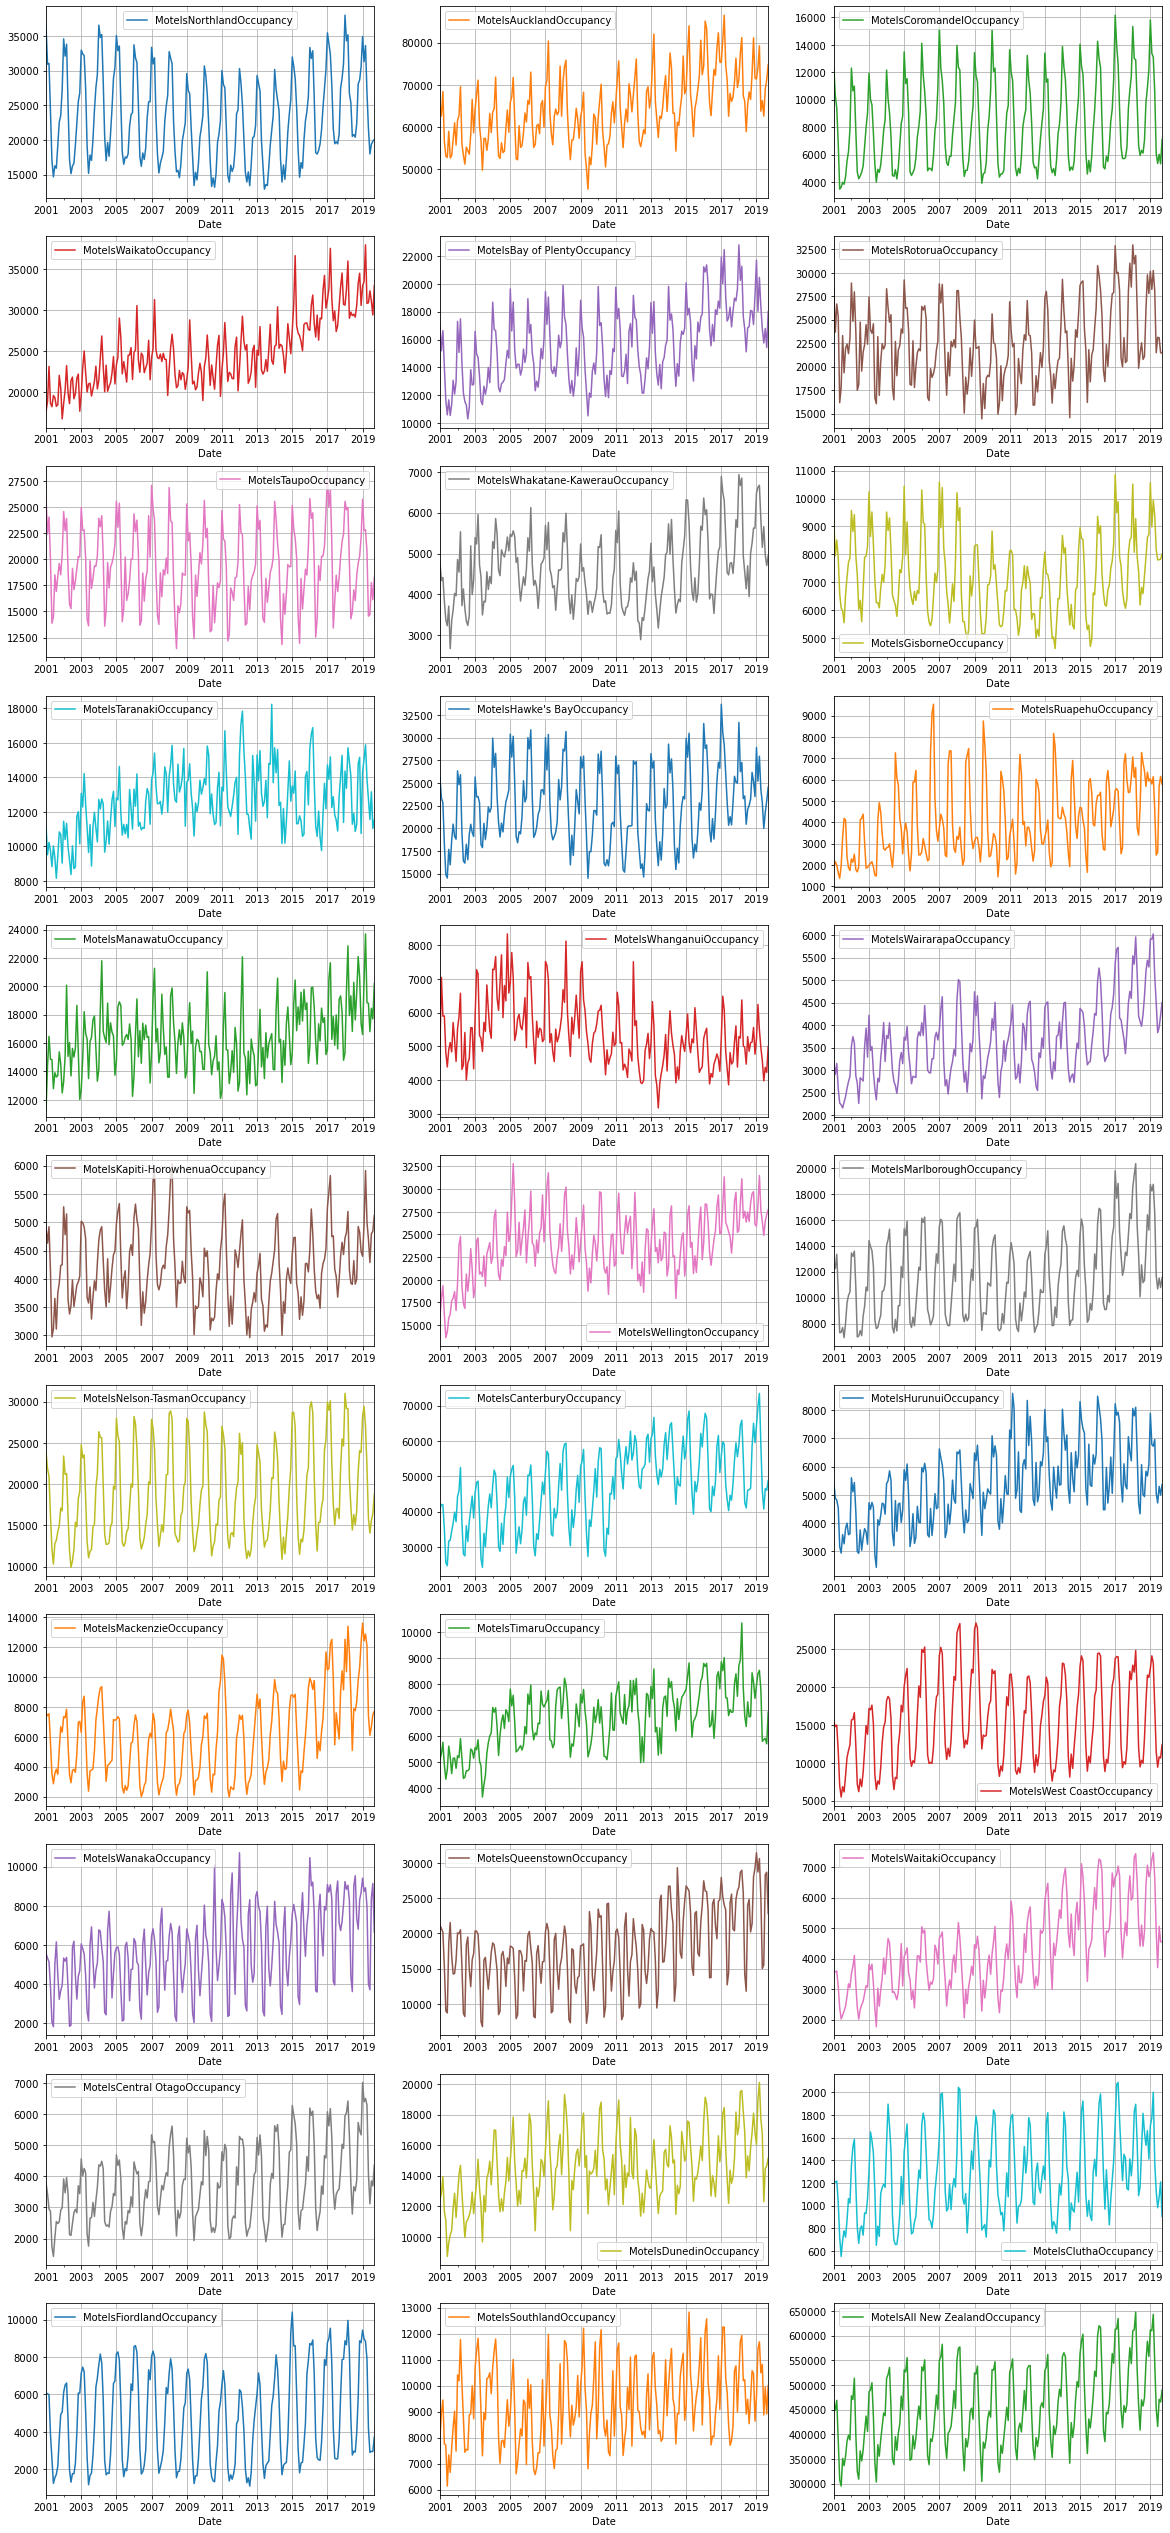

In [10]:
#Lets look at motels
motel_accomodation = accomodation.filter(regex=('^Motel')).filter(regex=('Occupancy$')).columns

accomodation[motel_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(motel_accomodation)/3)+1, 3), figsize = (20,50));

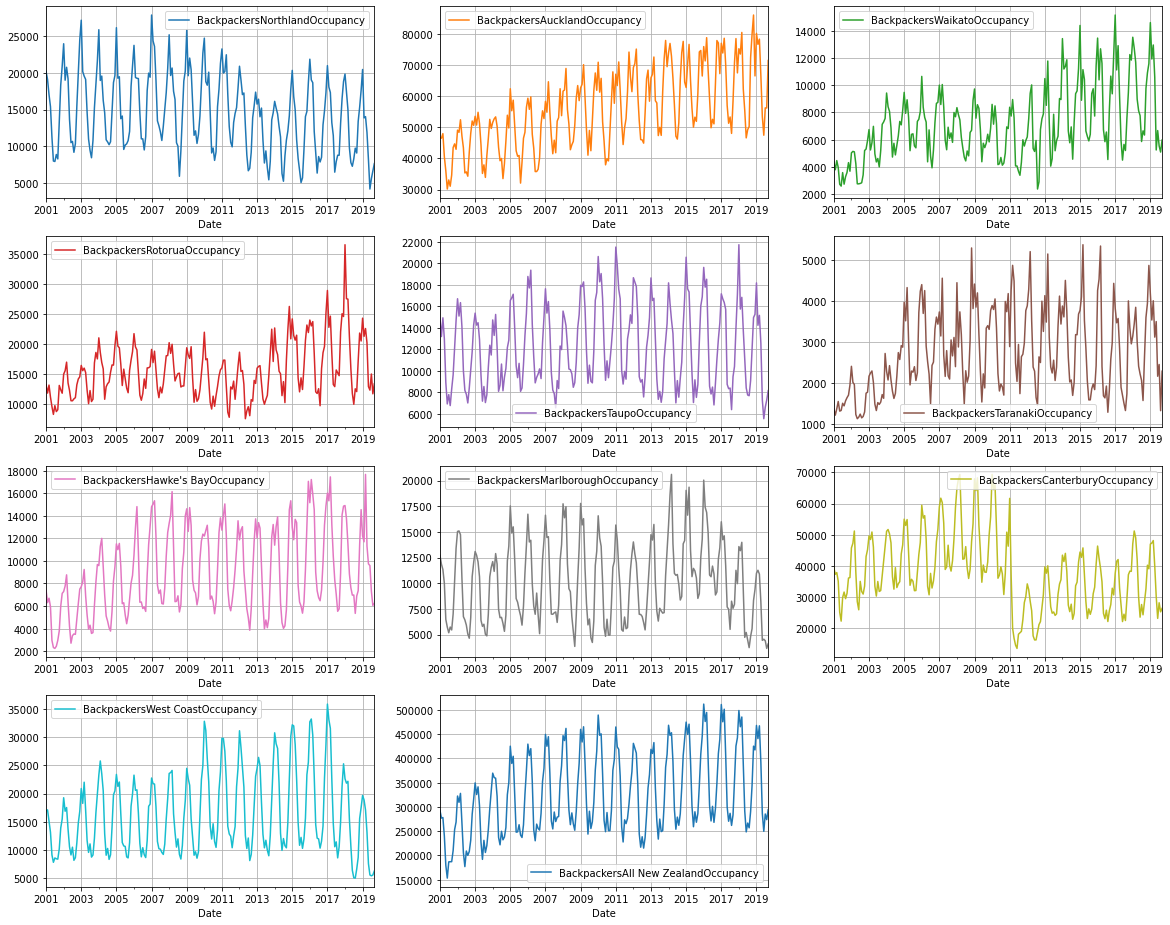

In [11]:
#Lets look at backpackers
backpacker_accomodation = accomodation.filter(regex=('^Backpackers')).filter(regex=('Occupancy$')).columns

accomodation[backpacker_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(backpacker_accomodation)/3)+1, 3), figsize = (20,50));

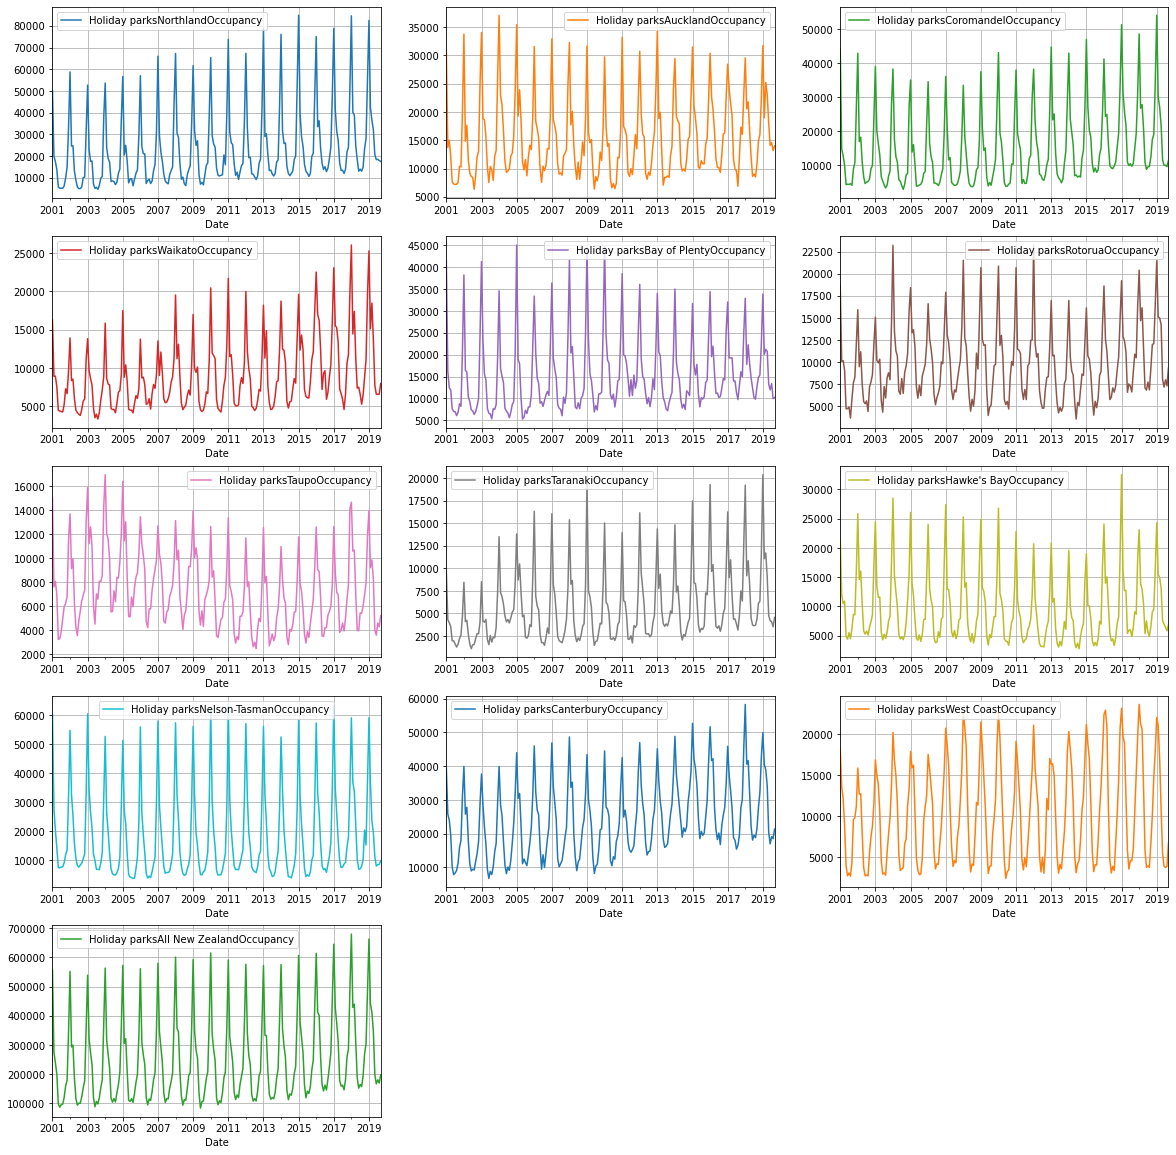

In [12]:
#Lets look at Holiday Parks
holidaypark_accomodation = accomodation.filter(regex=('^Holiday')).filter(regex=('Occupancy$')).columns

accomodation[holidaypark_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(holidaypark_accomodation)/3)+1, 3), figsize = (20,50));

Now that we've looked at our accomodations, lets explore our tourism numbers and see what can be done there.

In [13]:
arrivals.head()

Unnamed: 0  BusinessAuckland airport  BusinessChristchurch airport  \
0    1978M04                      3428                           468   
1    1978M05                      2264                           524   
2    1978M06                      2136                           280   
3    1978M07                      2156                           324   
4    1978M08                      2304                           536   

   BusinessDunedin airport  BusinessHamilton airport  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   BusinessPalmerston North airport  BusinessRotorua airport  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   BusinessWellington airport  BusinessQueenstown airport  \
0                         492                           0   
1                         428                           0   
2                         384                           0   
3                         380                           0   
4                         496                           0   

   BusinessTOTAL NEW ZEALAND PORTS  ...  \
0                             4408  ...   
1                             3236  ...   
2                             2880  ...   
3                             2964  ...   
4                             3416  ...   

   Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
0                                            3324   
1                                            3568   
2                                            2600   
3                                            3144   
4                                            4204   

   TOTAL ALL TRAVEL PURPOSESAuckland airport  \
0                                      19856   
1                                      15428   
2                                      11416   
3                                      14072   
4                                      17960   

   TOTAL ALL TRAVEL PURPOSESChristchurch airport  \
0                                           6240   
1                                           5240   
2                                           2708   
3                                           4900   
4                                           7900   

   TOTAL ALL TRAVEL PURPOSESDunedin airport  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   TOTAL ALL TRAVEL PURPOSESHamilton airport  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   TOTAL ALL TRAVEL PURPOSESPalmerston North airport  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   TOTAL ALL TRAVEL PURPOSESRotorua airport  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   TOTAL ALL TRAVEL PURPOSESWellington airport  \
0                                         2116   
1       

In [14]:
#we'll do a similar process for converting the date-time and this will do it in one cell!
arrivals = arrivals.rename(columns = {'Unnamed: 0':'Date'})
arrivals['Date'] = pd.to_datetime(arrivals['Date'], yearfirst = True, format = '%YM%m')
arrivals = arrivals.set_index("Date")
arrivals.head()

BusinessAuckland airport  BusinessChristchurch airport  \
Date                                                                 
1978-04-01                      3428                           468   
1978-05-01                      2264                           524   
1978-06-01                      2136                           280   
1978-07-01                      2156                           324   
1978-08-01                      2304                           536   

            BusinessDunedin airport  BusinessHamilton airport  \
Date                                                            
1978-04-01                        0                         0   
1978-05-01                        0                         0   
1978-06-01                        0                         0   
1978-07-01                        0                         0   
1978-08-01                        0                         0   

            BusinessPalmerston North airport  BusinessRotorua airport  \
Date                                                                    
1978-04-01                                 0                        0   
1978-05-01                                 0                        0   
1978-06-01                                 0                        0   
1978-07-01                                 0                        0   
1978-08-01                                 0                        0   

            BusinessWellington airport  BusinessQueenstown airport  \
Date                                                                 
1978-04-01                         492                           0   
1978-05-01                         428                           0   
1978-06-01                         384                           0   
1978-07-01                         380                           0   
1978-08-01                         496                           0   

            BusinessTOTAL NEW ZEALAND PORTS  Holiday/VacationAuckland airport  \
Date                                                                            
1978-04-01                             4408                             10476   
1978-05-01                             3236                              7168   
1978-06-01                             2880                              4640   
1978-07-01                             2964                              6184   
1978-08-01                             3416                              8236   

            ...  Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
Date        ...                                                   
1978-04-01  ...                                            3324   
1978-05-01  ...                                            3568   
1978-06-01  ...                                            2600   
1978-07-01  ...                                            3144   
1978-08-01  ...                                            4204   

            TOTAL ALL TRAVEL PURPOSESAuckland airport  \
Date                                                    
1978-04-01                                      19856   
1978-05-01                                      15428   
1978-06-01                                      11416   
1978-07-01                                      14072   
1978-08-01                                      17960   

            TOTAL ALL TRAVEL PURPOSESChristchurch airport  \
Date                                                        
1978-04-01                                           6240   
1978-05-01                                           5240   
1978-06-01                                           2708   
1978-07-01                                           4900   
1978-08-01                                           7900   

            TOTAL ALL TRAVEL PURPOSESDunedin airport  \
Date                                                   
1978-04-01                                         0   
1978-05-01                  

In [15]:
#Lets drop the "airport" from each of our columns

arrivals.columns = arrivals.columns.str.strip(r'airport$')
arrivals.head()

BusinessAuckland   BusinessChristchurch   BusinessDunedin   \
Date                                                                     
1978-04-01               3428                    468                 0   
1978-05-01               2264                    524                 0   
1978-06-01               2136                    280                 0   
1978-07-01               2156                    324                 0   
1978-08-01               2304                    536                 0   

            BusinessHamilton   BusinessPalmerston North   BusinessRotorua   \
Date                                                                         
1978-04-01                  0                          0                 0   
1978-05-01                  0                          0                 0   
1978-06-01                  0                          0                 0   
1978-07-01                  0                          0                 0   
1978-08-01                  0                          0                 0   

            BusinessWellington   BusinessQueenstown   \
Date                                                   
1978-04-01                  492                    0   
1978-05-01                  428                    0   
1978-06-01                  384                    0   
1978-07-01                  380                    0   
1978-08-01                  496                    0   

            BusinessTOTAL NEW ZEALAND PORTS  Holiday/VacationAuckland   ...  \
Date                                                                    ...   
1978-04-01                             4408                      10476  ...   
1978-05-01                             3236                       7168  ...   
1978-06-01                             2880                       4640  ...   
1978-07-01                             2964                       6184  ...   
1978-08-01                             3416                       8236  ...   

            Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
Date                                                         
1978-04-01                                            3324   
1978-05-01                                            3568   
1978-06-01                                            2600   
1978-07-01                                            3144   
1978-08-01                                            4204   

            TOTAL ALL TRAVEL PURPOSESAuckland   \
Date                                             
1978-04-01                               19856   
1978-05-01                               15428   
1978-06-01                               11416   
1978-07-01                               14072   
1978-08-01                               17960   

            TOTAL ALL TRAVEL PURPOSESChristchurch   \
Date                                                 
1978-04-01                                    6240   
1978-05-01                                    5240   
1978-06-01                                    2708   
1978-07-01                                    4900   
1978-08-01                                    7900   

            TOTAL ALL TRAVEL PURPOSESDunedin   \
Date                                            
1978-04-01                                  0   
1978-05-01                                  0   
1978-06-01                                  0   
1978-07-01                                  0   
1978-08-01                                  0   

            TOTAL ALL TRAVEL PURPOSESHamilton   \
Date                                             
1978-04-01                                   0   
1978-05-01                                   0   
1978-06-01                                   0   
1978-07-01                                   0   
1978-08-01                                   0   

            TOTAL ALL TRAVEL PURPOSESPalmerston North   \
Date                                                     
1978-04-01             

In [16]:
#lets examine the reasons for entry for each location
arrivals.columns

#looks like we have business, holiday/vacation, visit friends, and total travel!

Index(['BusinessAuckland ', 'BusinessChristchurch ', 'BusinessDunedin ',
       'BusinessHamilton ', 'BusinessPalmerston North ', 'BusinessRotorua ',
       'BusinessWellington ', 'BusinessQueenstown ',
       'BusinessTOTAL NEW ZEALAND PORTS', 'Holiday/VacationAuckland ',
       'Holiday/VacationChristchurch ', 'Holiday/VacationDunedin ',
       'Holiday/VacationHamilton ', 'Holiday/VacationPalmerston North ',
       'Holiday/VacationRotorua ', 'Holiday/VacationWellington ',
       'Holiday/VacationQueenstown ',
       'Holiday/VacationTOTAL NEW ZEALAND PORTS',
       'Visit Friends/RelativesAuckland ',
       'Visit Friends/RelativesChristchurch ',
       'Visit Friends/RelativesDunedin ', 'Visit Friends/RelativesHamilton ',
       'Visit Friends/RelativesPalmerston North ',
       'Visit Friends/RelativesRotorua ', 'Visit Friends/RelativesWellington ',
       'Visit Friends/RelativesQueenstown ',
       'Visit Friends/RelativesTOTAL NEW ZEALAND PORTS',
       'TOTAL ALL TRAVEL PURPO

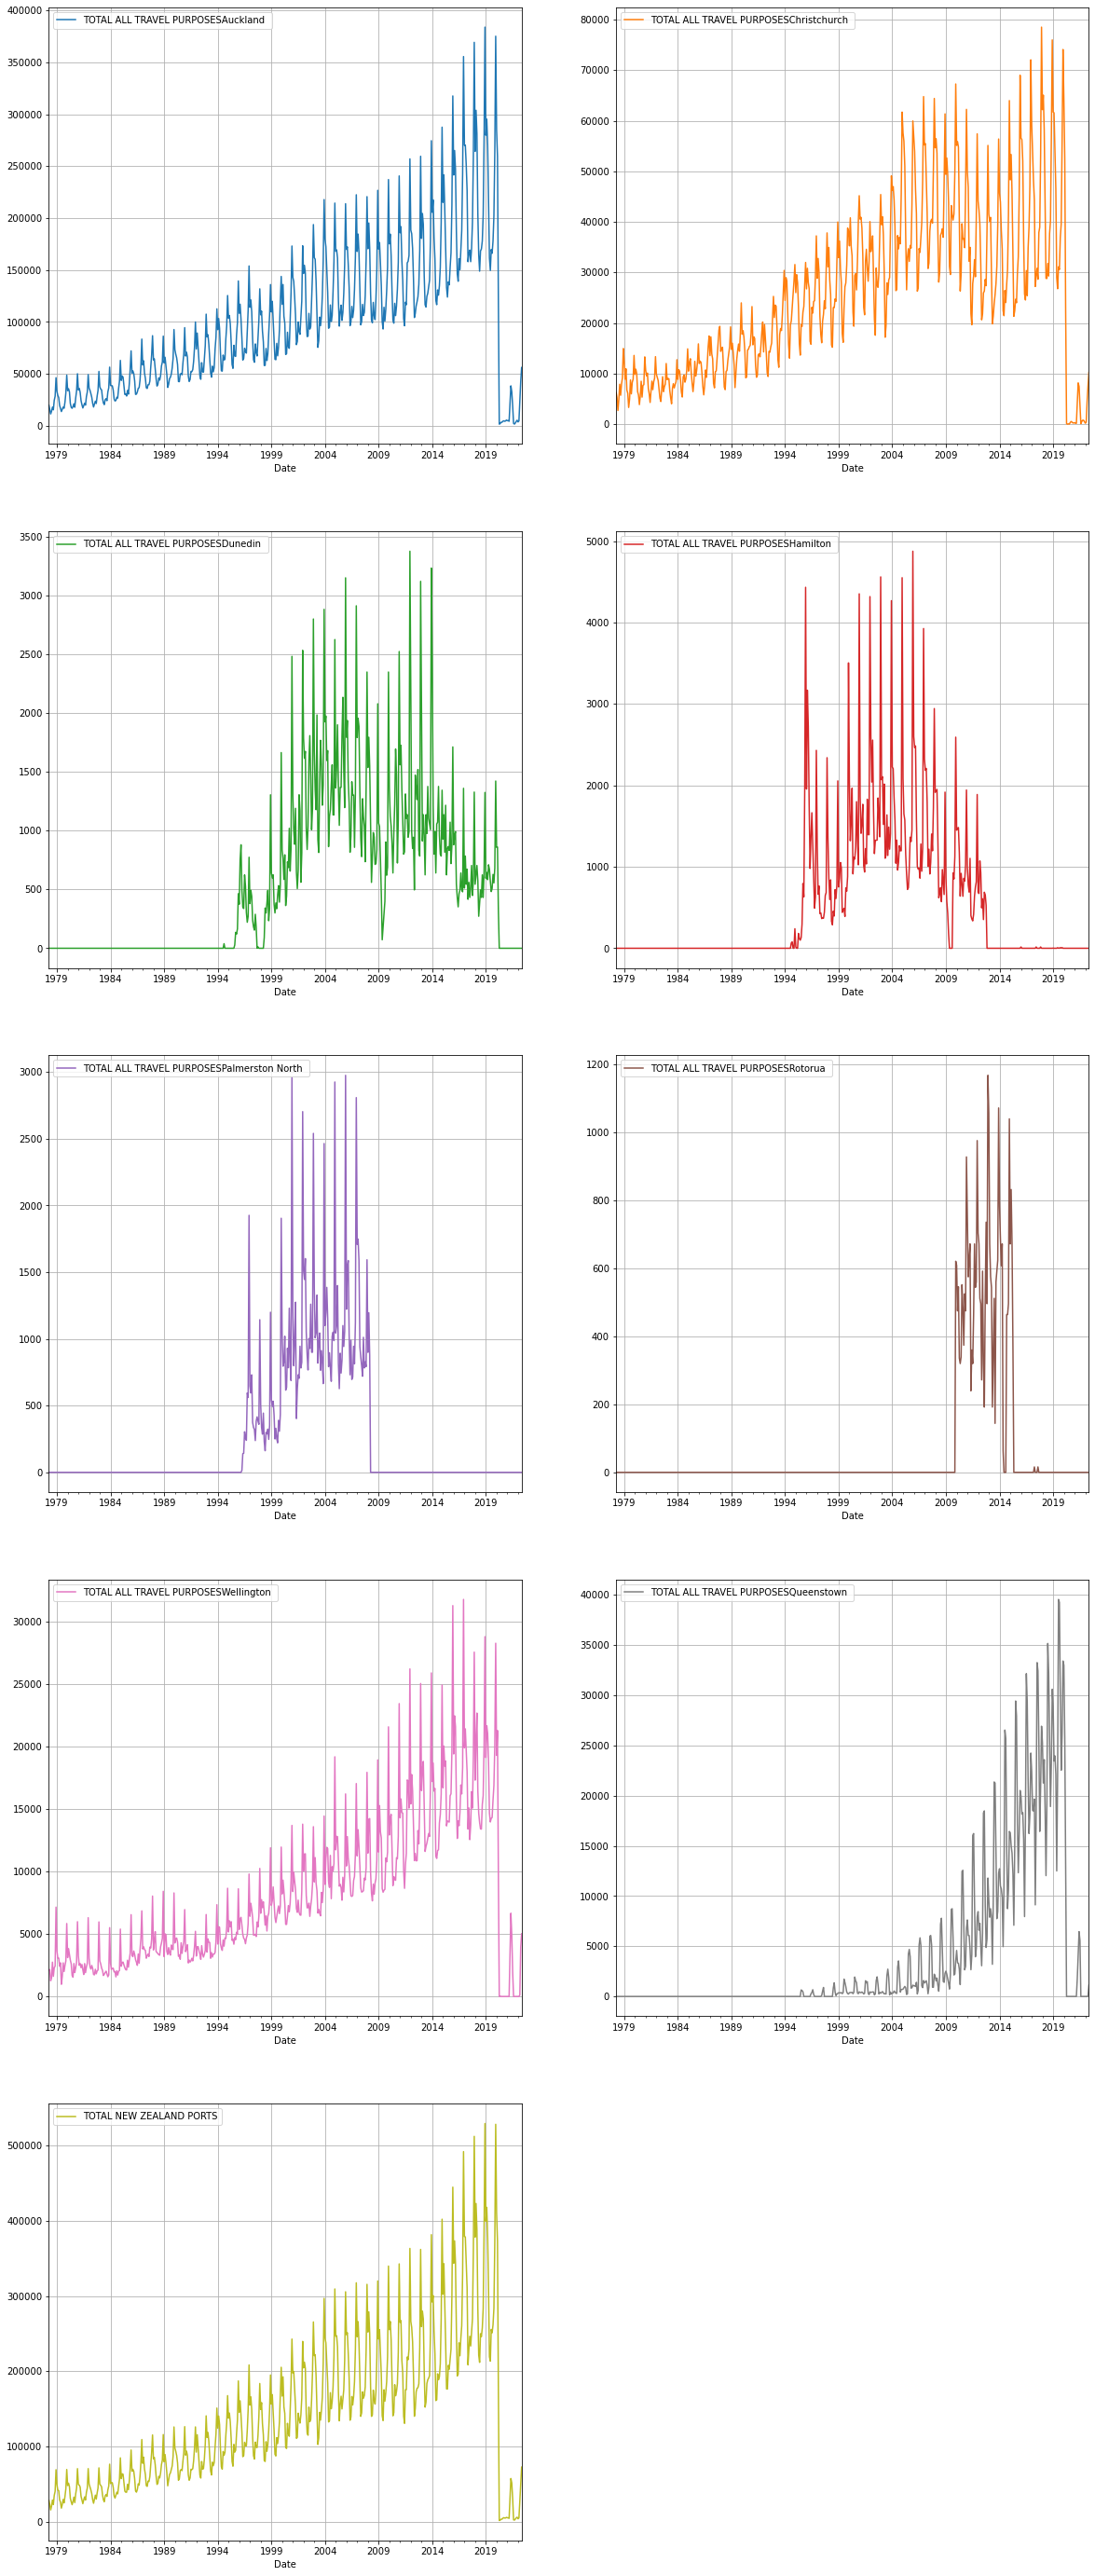

In [17]:
#Lets look at TOTAL ENTRY!
total_entry = arrivals.filter(regex=('^TOTAL')).columns

arrivals[total_entry].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(total_entry)/2)+1, 2), figsize = (20,50));

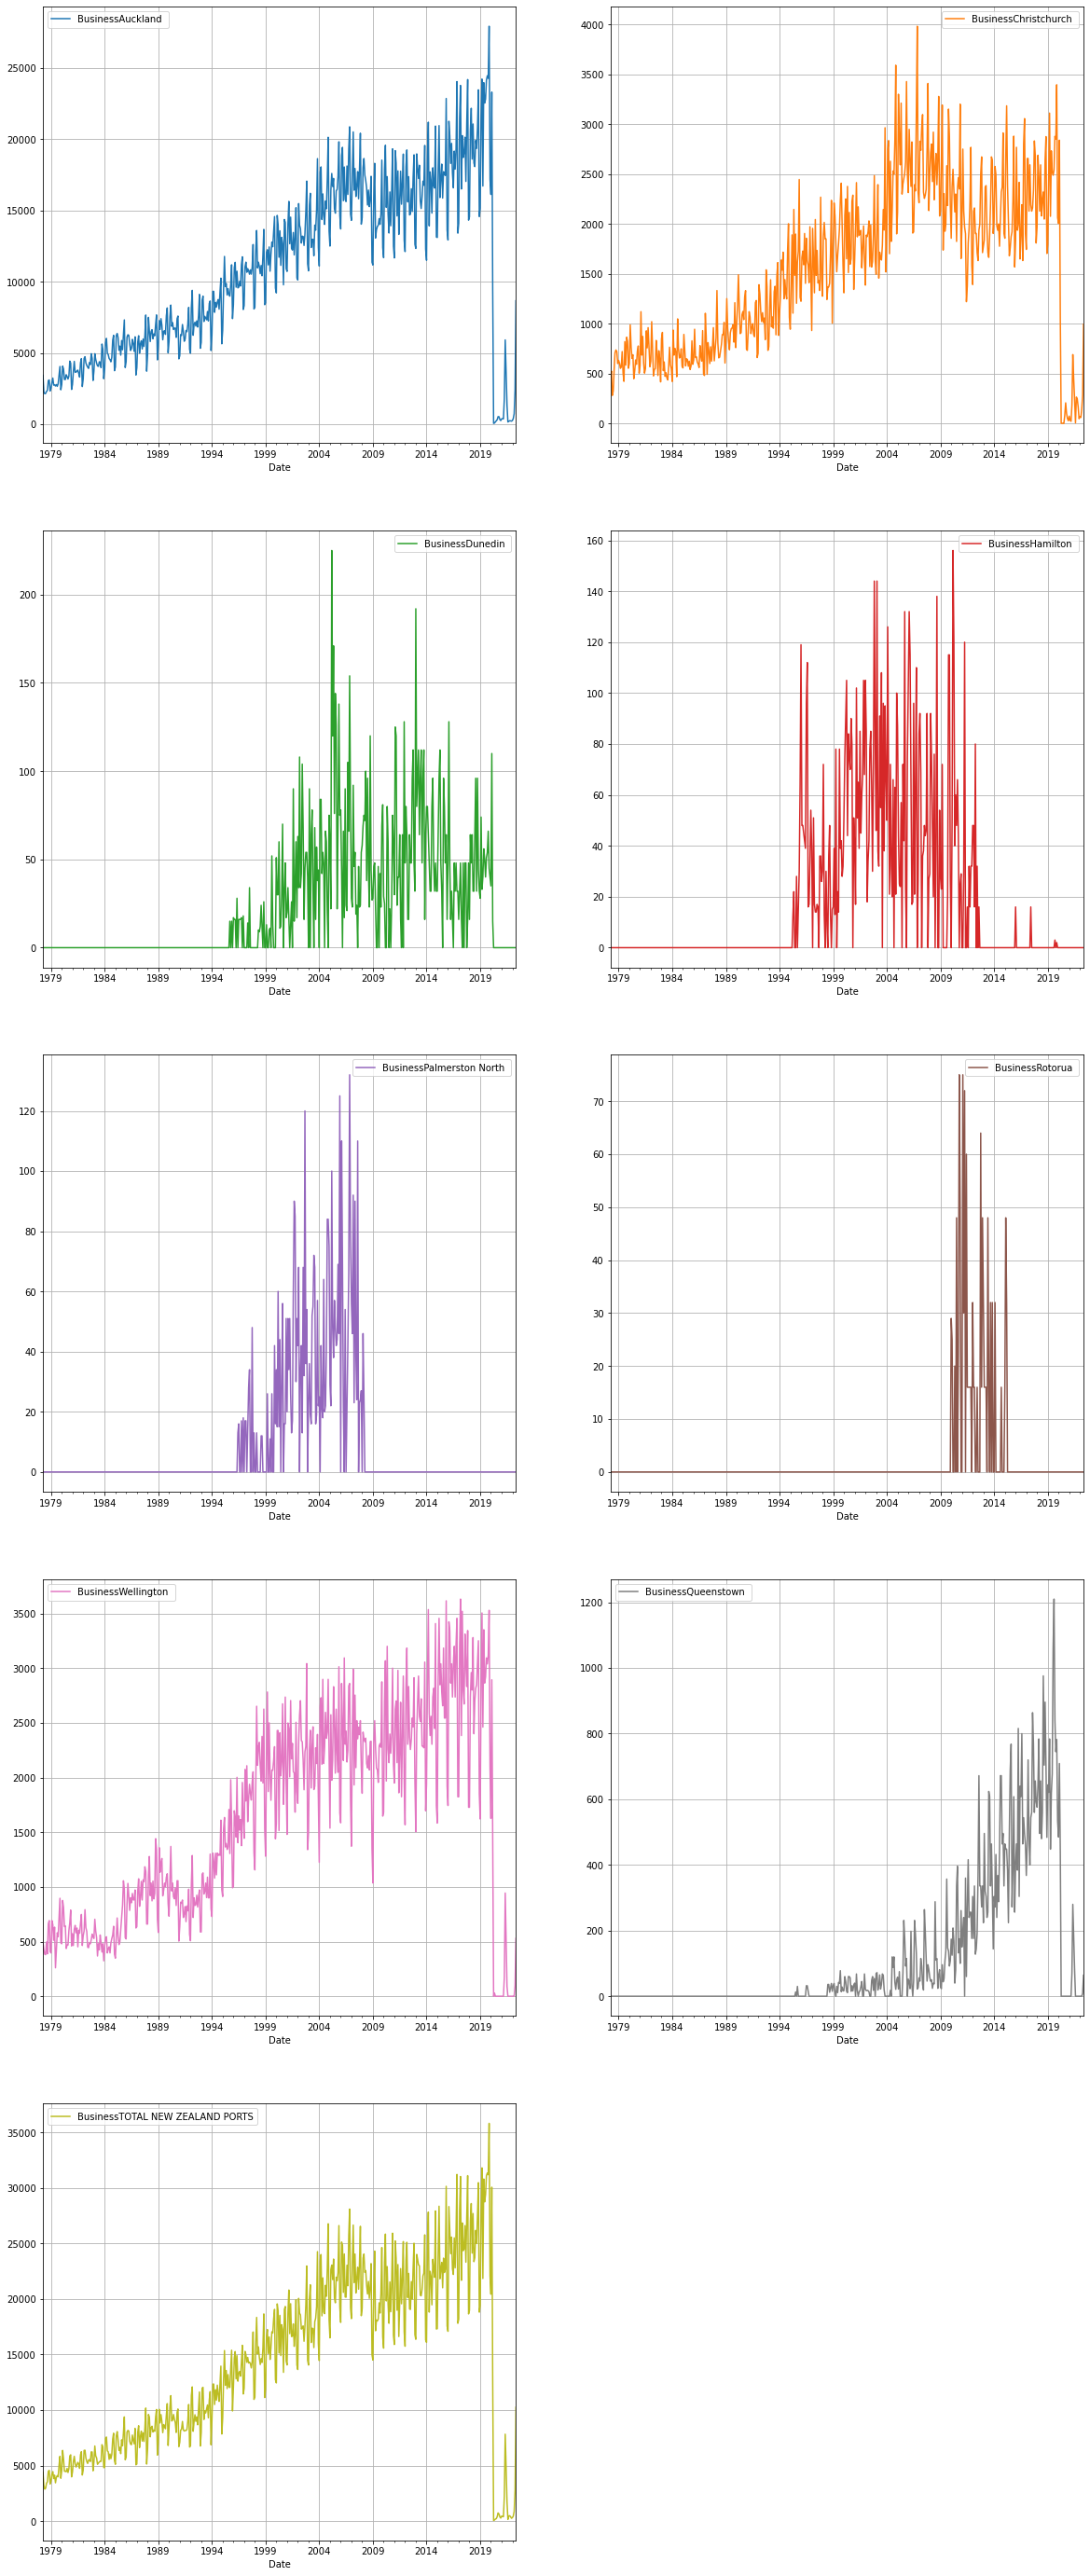

In [18]:
#Lets look at business
business_entry = arrivals.filter(regex=('^Business')).columns

arrivals[business_entry].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(business_entry)/2)+1, 2), figsize = (20,50));

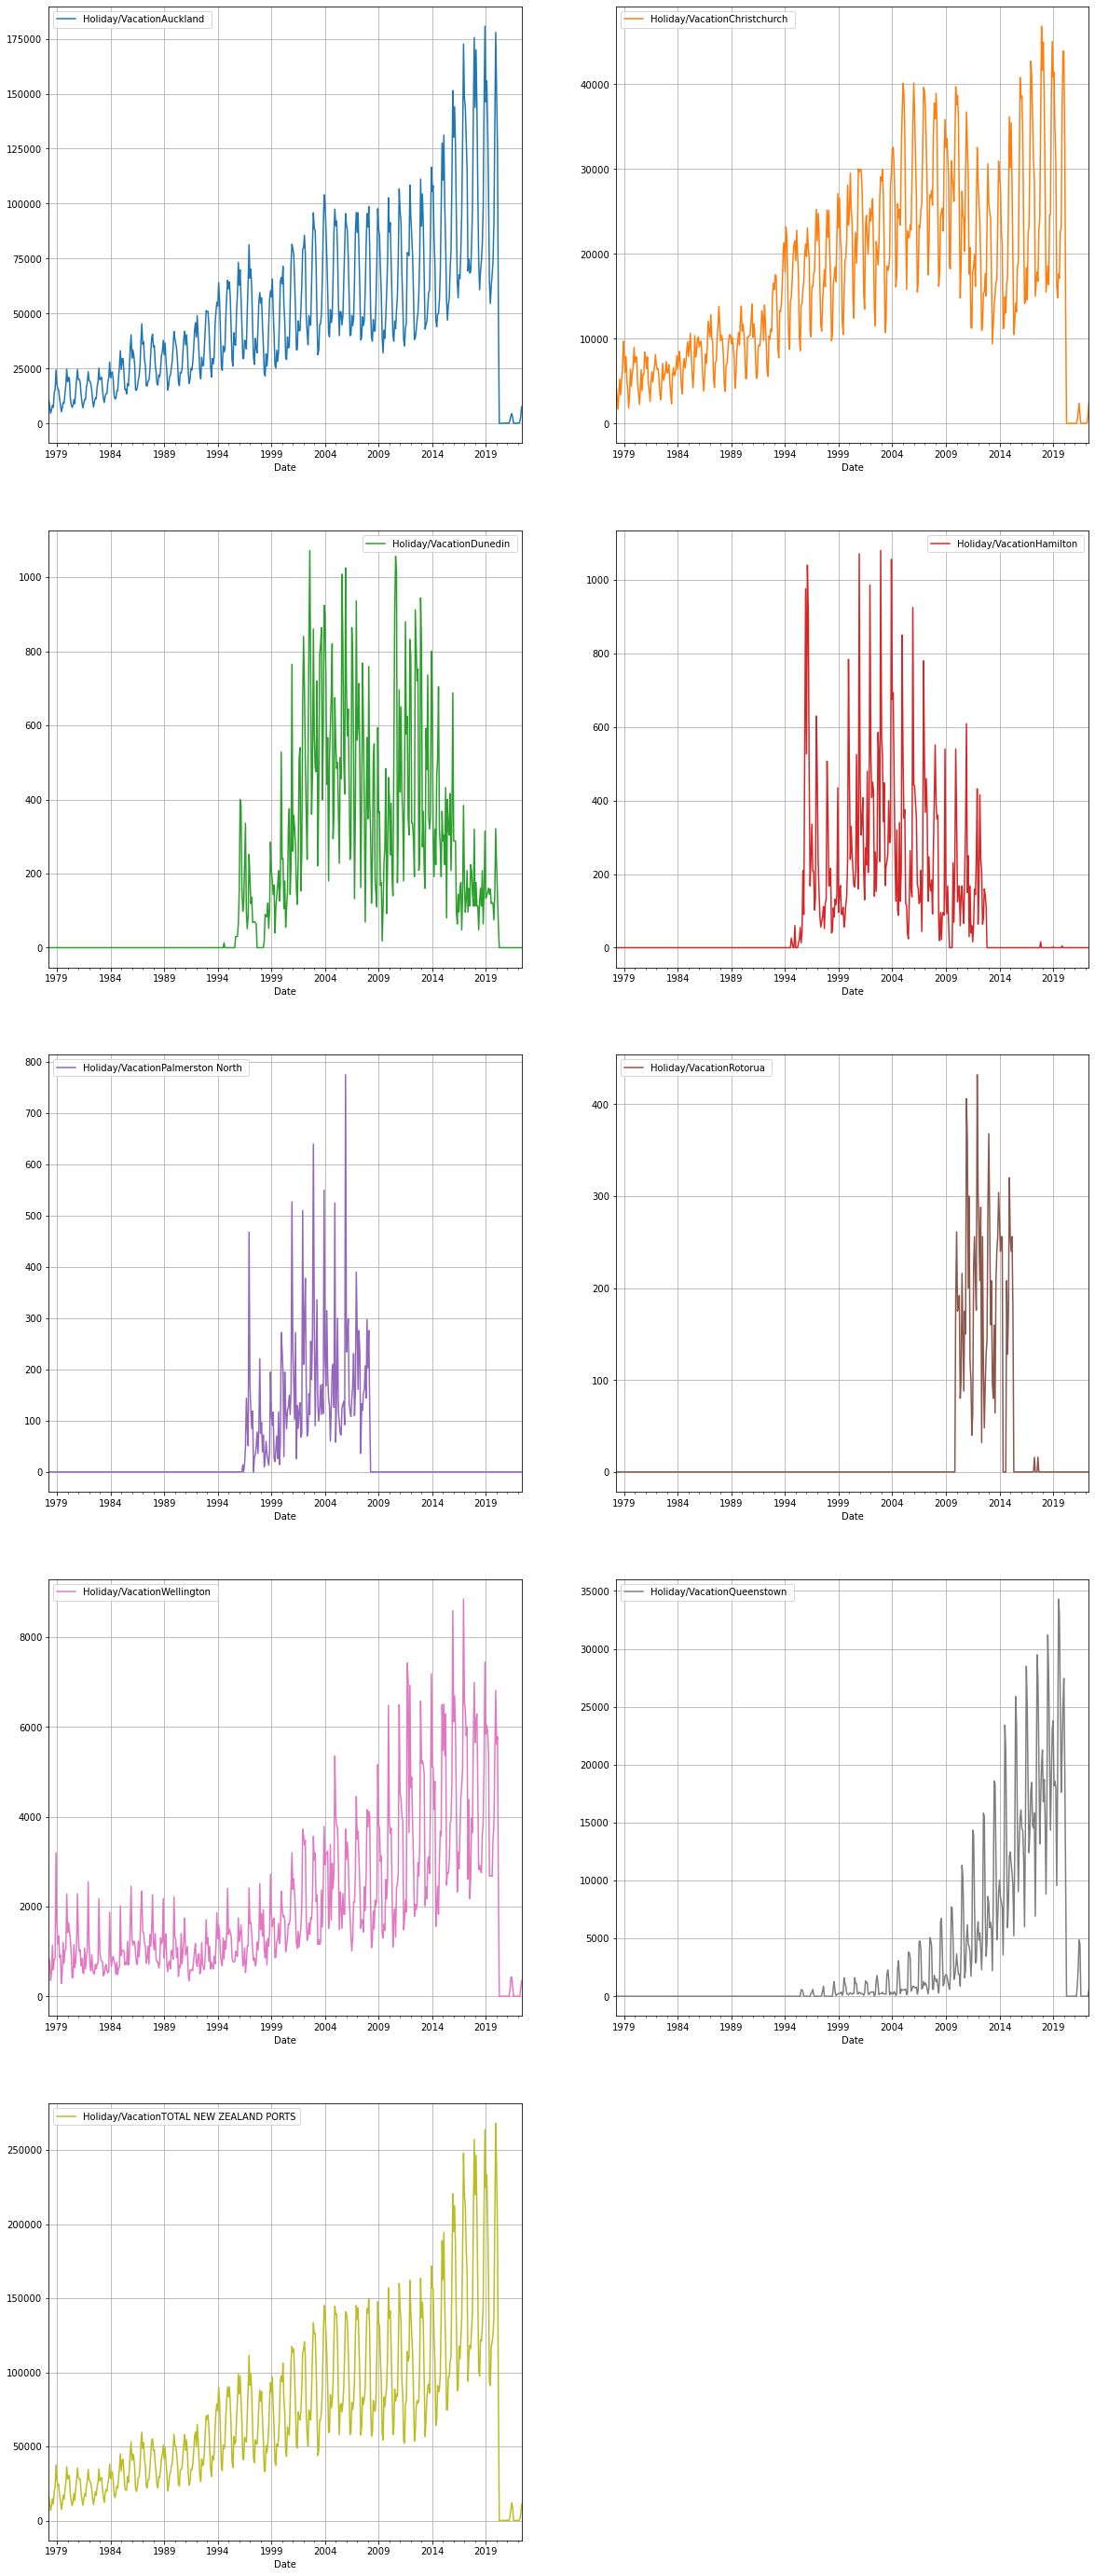

In [19]:
#Lets look at holiday
holiday_entry = arrivals.filter(regex=('^Holiday')).columns

arrivals[holiday_entry].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(holiday_entry)/2)+1, 2), figsize = (20,50));

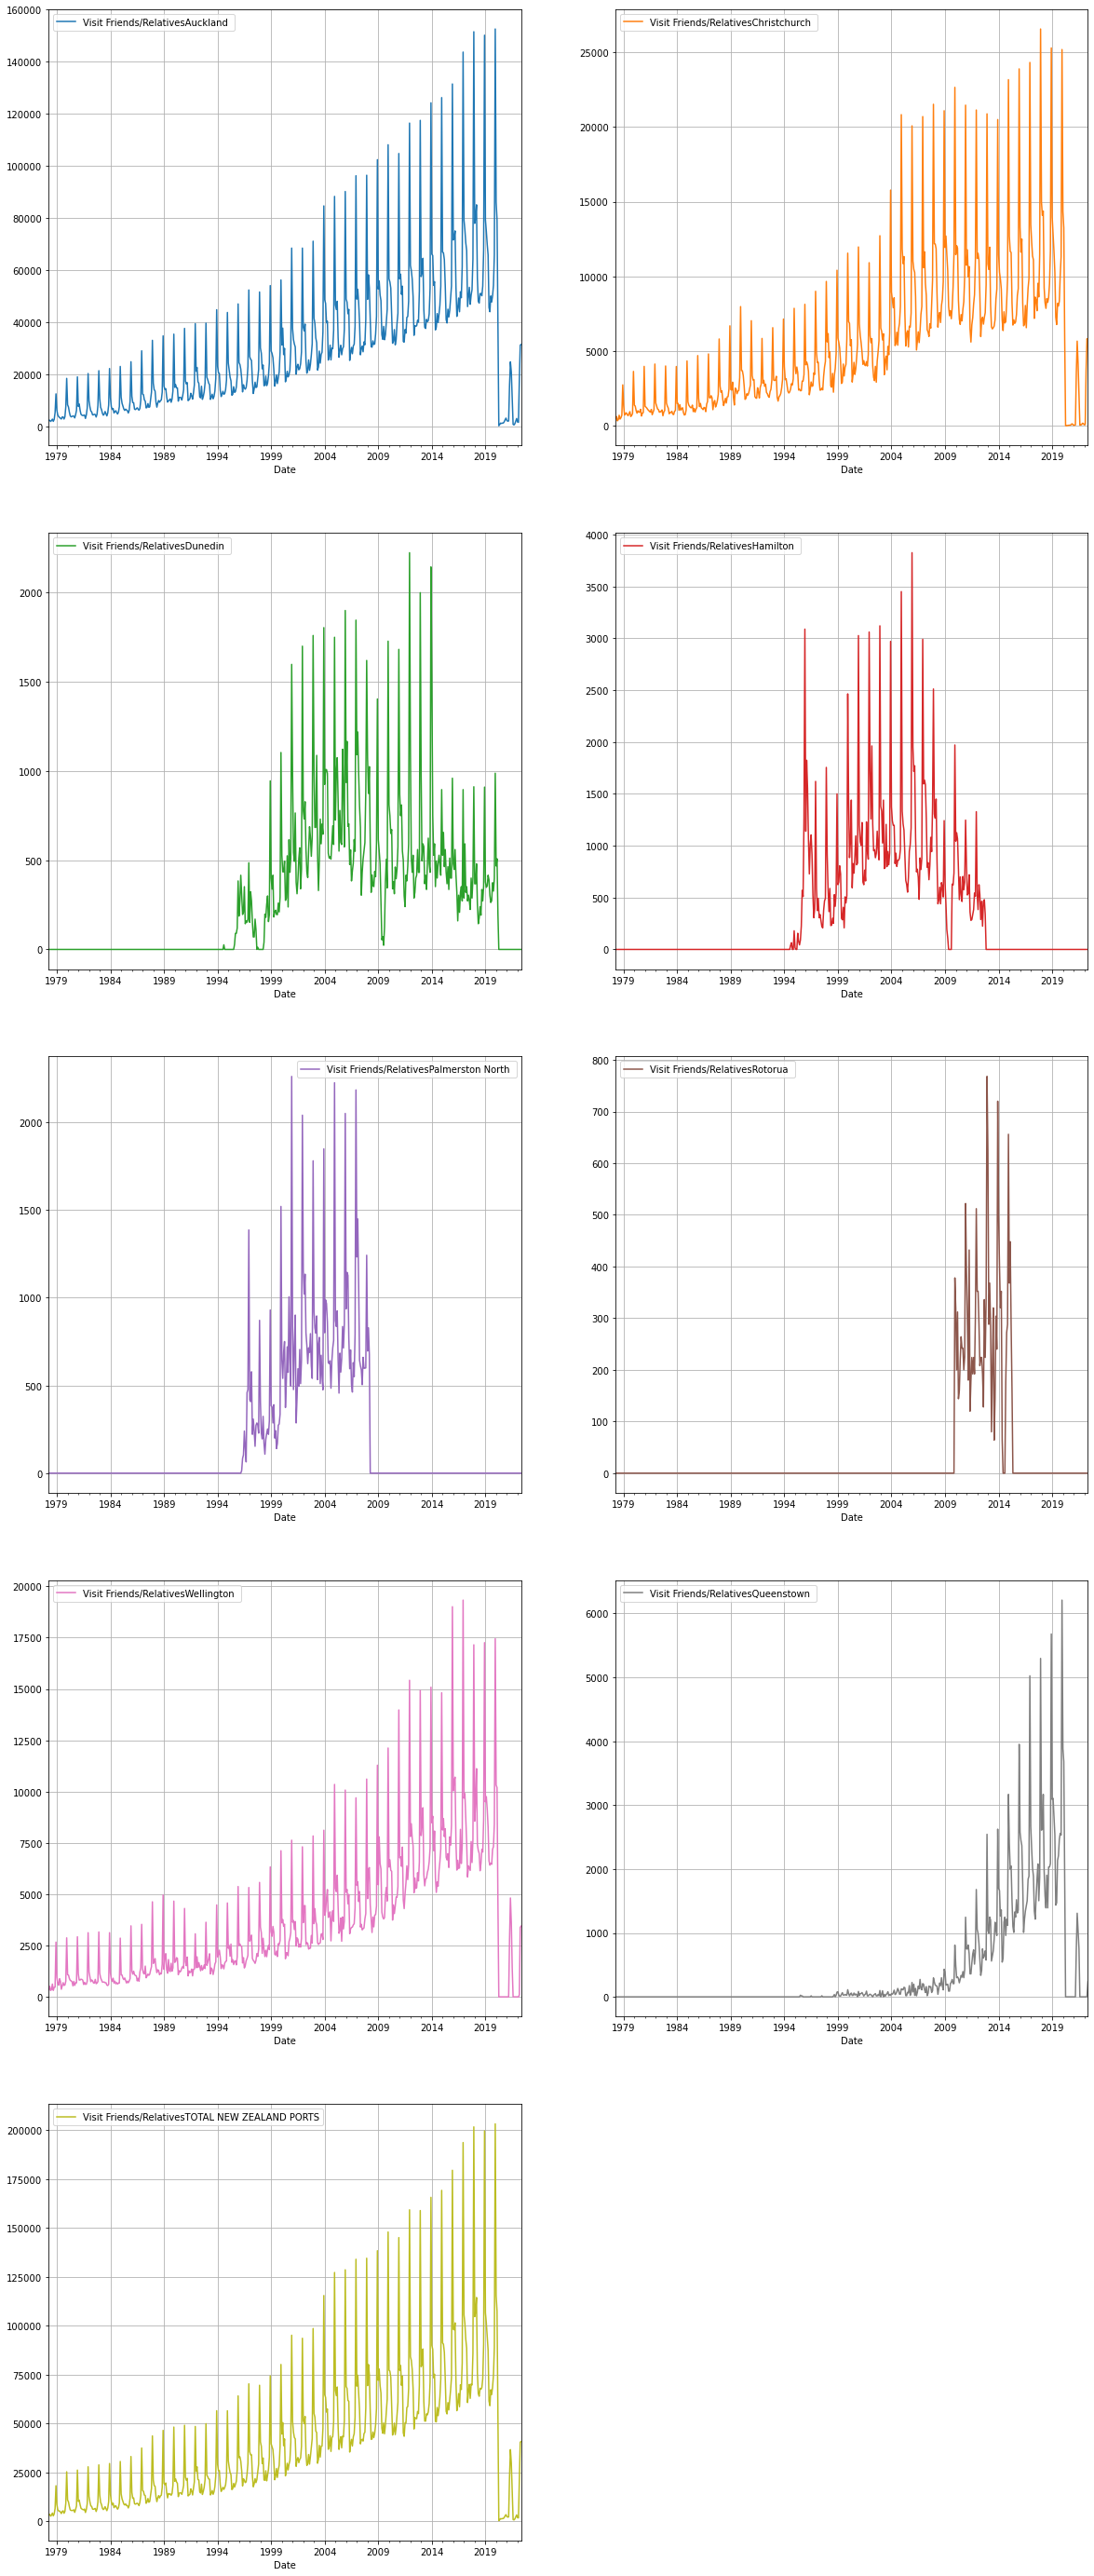

In [20]:
#Lets look at visiting friends
visit_entry = arrivals.filter(regex=('^Visit')).columns

arrivals[visit_entry].plot(subplots = True, grid = True, sharex=False, \
                                          layout = (int(len(visit_entry)/2)+1, 2), figsize = (20,50));